In [12]:
# import libraries

import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots I will create

In [13]:
# read in the data

df = pd.read_csv('movies_data_set.csv')

In [14]:
# Look at the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [15]:
# Checking for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [22]:
df = df.dropna()

In [23]:
# Data types for columns

df.dtypes

name            object
rating          object
genre           object
year             int64
released        object
score          float64
votes          float64
director        object
writer          object
star            object
country         object
budget           int64
gross            int64
company         object
runtime        float64
yearcorrect    float64
dtype: object

In [9]:
# Converting 'released' column from object to string

df['released'] = pd.Series(df['released'], dtype="string")

In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     string
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [20]:
# Create new year of released column based on column 'released'

df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(float)


In [21]:
df

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020.0
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020.0


In [26]:
# ORder by 'gross' column
df.sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,On the Edge,PG-13,Drama,1985,"May 2, 1986 (United States)",6.8,214.0,Rob Nilsson,Roy Kissin,Bruce Dern,United States,0,0,Alliance Communications Corporation,95.0,1986.0
3425,The Acid House,Unrated,Comedy,1998,"January 1, 1999 (United Kingdom)",6.3,7400.0,Paul McGuigan,Irvine Welsh,Stephen McCole,United Kingdom,0,0,Picture Palace North,111.0,1999.0
835,Came a Hot Friday,PG,Adventure,1985,"October 4, 1985 (United States)",6.6,192.0,Ian Mune,Ronald Hugh Morrieson,Peter Bland,New Zealand,0,0,Mirage Films,101.0,1985.0
836,Wuthering Heights,Not Rated,Drama,1985,"October 9, 1985 (France)",6.5,339.0,Jacques Rivette,Pascal Bonitzer,Fabienne Babe,France,0,0,La Cecilia,130.0,1985.0


In [27]:
# option for seeing the whole df -> pd.set_option('display.max_rows', None)

In [28]:
# Checking for duplicates
# If there were duplicates, run df.drop_duplicates() would clean it

df['company'].drop_duplicates().sort_values(ascending=False)

7129                                thefyzz
5664                            micro_scope
6412               iDeal Partners Film Fund
4007                               i5 Films
6793                             i am OTHER
                       ...                 
5813                        10 West Studios
3748                     1+2 Seisaku Iinkai
3024                        .406 Production
7525    "Weathering With You" Film Partners
4345        "DIA" Productions GmbH & Co. KG
Name: company, Length: 2339, dtype: object

In [29]:
# Possible high correlations with Gross Revenue
# Budget
# Company

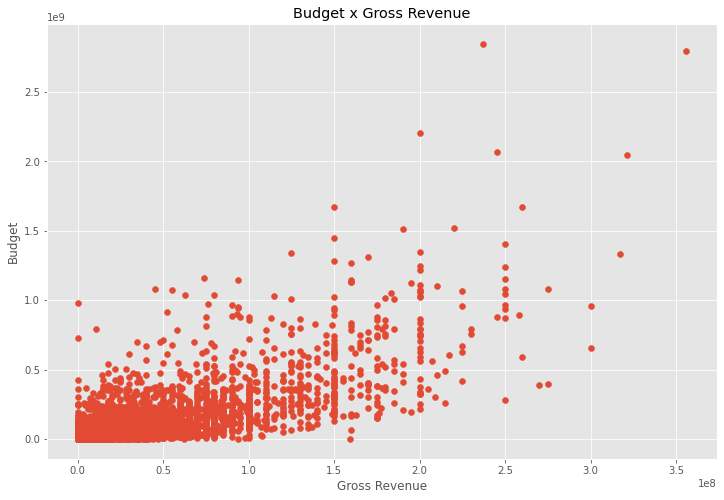

In [31]:
# Scatter plot with budget x gorss

plt.scatter(x=df['budget'], y=df['gross'])
plt.title('Budget x Gross Revenue')
plt.xlabel('Gross Revenue')
plt.ylabel('Budget')
plt.show()


<AxesSubplot:xlabel='budget', ylabel='gross'>

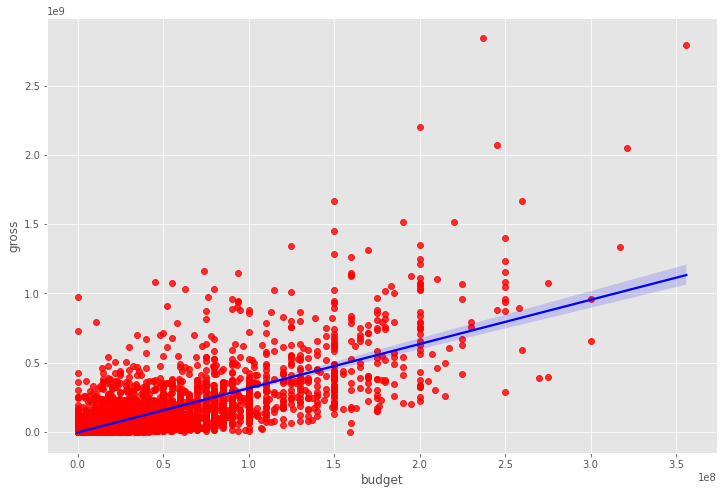

In [33]:
# Create a plot with Budget x Gross using Seaborn 

sns.regplot(x='budget', y='gross', data=df, scatter_kws={'color': 'red'}, line_kws={'color':'blue'})

In [35]:
# Checking correlations


In [36]:
df.corr()

,year,score,votes,budget,gross,runtime,yearcorrect
year,1.000000,0.102346,0.226895,0.314842,0.264716,0.120676,0.997466
score,0.102346,1.000000,0.411931,0.056781,0.188259,0.400574,0.109815
votes,0.226895,0.411931,1.000000,0.485301,0.632987,0.309366,0.222317
budget,0.314842,0.056781,0.485301,1.000000,0.750562,0.270042,0.305530
gross,0.264716,0.188259,0.632987,0.750562,1.000000,0.244942,0.257703
runtime,0.120676,0.400574,0.309366,0.270042,0.244942,1.000000,0.120370
yearcorrect,0.997466,0.109815,0.222317,0.305530,0.257703,0.120370,1.000000


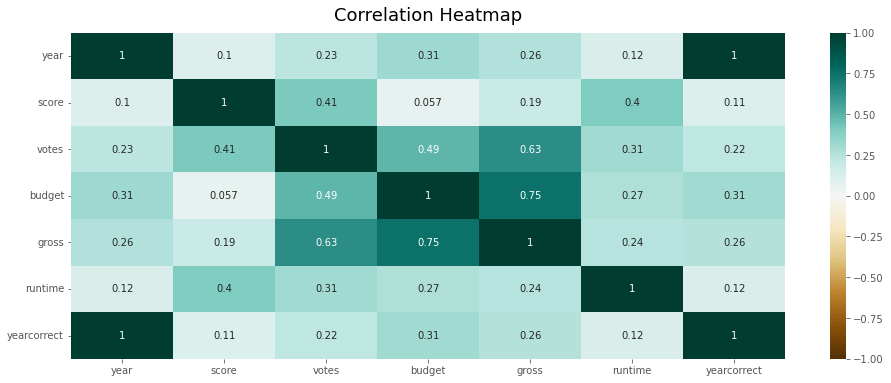

In [44]:
# Correlation heatmap

#sns.heatmap(df.corr())
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

C:\Users\Meninos\AppData\Local\Temp\ipykernel_20016\3048664100.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


Text(87.0, 0.5, 'Movie Features')

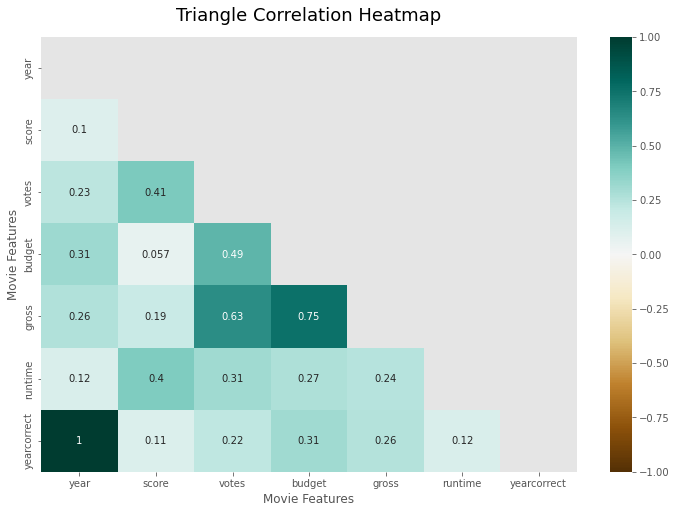

In [47]:
# Triangle correlation heatmap movie features

mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [49]:
# Checking the correlation company x gross

df_numbered = df

for col_name in df_numbered.columns:
    if(df_numbered[col_name].dtype == 'object'):
        df_numbered[col_name] = df_numbered[col_name].astype('category')
        df_numbered[col_name] = df_numbered[col_name].cat.codes


In [50]:
df_numbered

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6506,6,6,1980,1685,8.4,927000.0,2544,3958,1022,54,19000000,46998772,2273,146.0,1980.0
1,5498,6,1,1980,1472,5.8,65000.0,2233,1612,316,55,4500000,58853106,710,104.0,1980.0
2,5073,4,0,1980,1751,8.7,1200000.0,1093,2534,1708,55,18000000,538375067,1505,124.0,1980.0
3,282,4,4,1980,1472,7.7,221000.0,1279,1975,2197,55,3500000,83453539,1769,88.0,1980.0
4,1016,6,4,1980,1523,7.3,108000.0,1037,511,398,55,6000000,39846344,1736,98.0,1980.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7652,5713,3,0,2020,490,6.8,3700.0,1076,1652,2747,8,80000000,461421559,360,149.0,2020.0
7653,6399,6,5,2020,91,5.4,2400.0,2475,3827,2385,55,0,3661,1860,98.0,2020.0
7656,6936,5,4,2020,1865,5.0,294.0,2470,3820,2326,55,0,413378,1862,120.0,2020.0
7658,789,6,6,2020,1091,6.6,35.0,1739,1051,515,55,5000,0,1709,78.0,2020.0


C:\Users\Meninos\AppData\Local\Temp\ipykernel_20016\2054722801.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df_numbered.corr(), dtype=np.bool))


Text(87.0, 0.5, 'Movie Features')

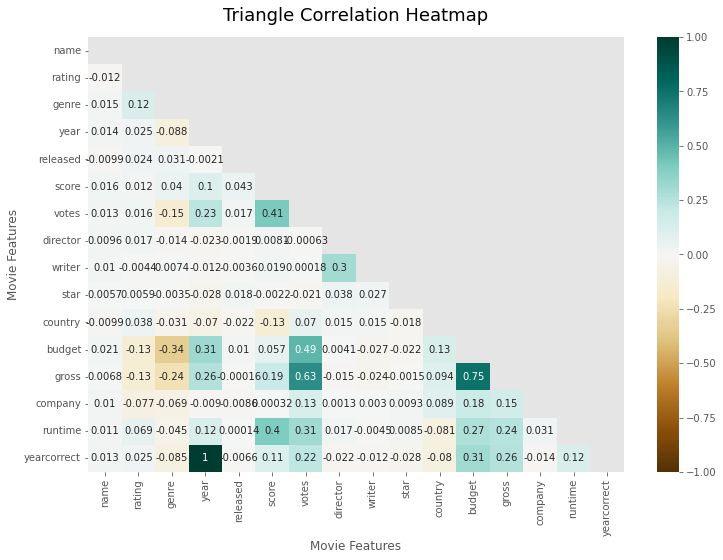

In [51]:
# Triangle correlation heatmap movie features

mask = np.triu(np.ones_like(df_numbered.corr(), dtype=np.bool))
heatmap = sns.heatmap(df_numbered.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

In [52]:
correlation_matrix = df_numbered.corr()

corr_pairs = correlation_matrix.unstack()

corr_pairs

name         name           1.000000
             rating        -0.011924
             genre          0.015300
             year           0.013514
             released      -0.009906
                              ...   
yearcorrect  budget         0.305530
             gross          0.257703
             company       -0.014054
             runtime        0.120370
             yearcorrect    1.000000
Length: 256, dtype: float64

In [54]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

budget       genre         -0.342064
genre        budget        -0.342064
             gross         -0.240903
gross        genre         -0.240903
votes        genre         -0.148420
                              ...   
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
Length: 256, dtype: float64

In [56]:
high_corr = sorted_pairs[(sorted_pairs) > 0.5]

high_corr

votes        gross          0.632987
gross        votes          0.632987
budget       gross          0.750562
gross        budget         0.750562
yearcorrect  year           0.997466
year         yearcorrect    0.997466
name         name           1.000000
company      company        1.000000
gross        gross          1.000000
budget       budget         1.000000
country      country        1.000000
star         star           1.000000
writer       writer         1.000000
director     director       1.000000
votes        votes          1.000000
score        score          1.000000
released     released       1.000000
year         year           1.000000
genre        genre          1.000000
rating       rating         1.000000
runtime      runtime        1.000000
yearcorrect  yearcorrect    1.000000
dtype: float64

In [ ]:
# Votes and budge have the highest correlation

# Company has a low correlation with gross